# Neural Network Softmax Extension with Keras

In [52]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 
import time
from random import sample

## 1. MNIST

### Keras implementation

In [342]:
digits=load_digits()
X = digits.data
y = digits.target

# Scale training features
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)

In [343]:
# Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [344]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [345]:
# Convert digits to vectors
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [531]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [532]:
# Define the keras model
model = Sequential()
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

# Compile the keras model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])

In [533]:
# Train the keras model
model.fit(X_train, y_v_train, epochs = 150, batch_size = 1)

Epoch 1/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.1838 - accuracy: 0.0974
Epoch 2/150
1078/1078 [==============================] - 1s 1ms/step - loss: 0.1025 - accuracy: 0.1150
Epoch 3/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0933 - accuracy: 0.1187
Epoch 4/150
1078/1078 [==============================] - 1s 1ms/step - loss: 0.0910 - accuracy: 0.1475
Epoch 5/150
1078/1078 [==============================] - 1s 1ms/step - loss: 0.0902 - accuracy: 0.1549
Epoch 6/150
1078/1078 [==============================] - 1s 1ms/step - loss: 0.0897 - accuracy: 0.2245
Epoch 7/150
1078/1078 [==============================] - 1s 1ms/step - loss: 0.0895 - accuracy: 0.2458
Epoch 8/150
1078/1078 [==============================] - 2s 1ms/step - loss: 0.0894 - accuracy: 0.2291
Epoch 9/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0892 - accuracy: 0.2440
Epoch 10/150
1078/1078 [==============================] - 2s 2ms/step - l

In [534]:
# Evaluate the keras model
accuracy = model.evaluate(X_test, y_v_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

719/719 [==============================] - 0s 243us/step
Accuracy: 77.75


### Keras implementation plus extension

In [535]:
# Define the keras model with softmax outer layer
model_plus_ext = Sequential()
model_plus_ext.add(Dense(64, activation='sigmoid'))
model_plus_ext.add(Dense(30, activation='sigmoid'))
model_plus_ext.add(Dense(10, activation='softmax'))

# Compile the keras model
model_plus_ext.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])

In [536]:
# Train the keras model
model_plus_ext.fit(X_train, y_v_train, epochs = 150, batch_size = 1)

Epoch 1/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0939 - accuracy: 0.0853
Epoch 2/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0918 - accuracy: 0.0937
Epoch 3/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0909 - accuracy: 0.0974: 0s - loss: 0.0910 - accuracy: 0.
Epoch 4/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0904 - accuracy: 0.0937
Epoch 5/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0901 - accuracy: 0.1002
Epoch 6/150
1078/1078 [==============================] - 2s 1ms/step - loss: 0.0899 - accuracy: 0.1113
Epoch 7/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0897 - accuracy: 0.1262
Epoch 8/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0896 - accuracy: 0.1373
Epoch 9/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0894 - accuracy: 0.1605
Epoch 10/150
1078/1078 [===============

In [537]:
# Evaluate the keras model
accuracy = model_plus_ext.evaluate(X_test, y_v_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

719/719 [==============================] - 0s 256us/step
Accuracy: 88.73


## 2. Fashion-MNIST

### Keras implementation

In [262]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [263]:
X_train = trainX
y_train = trainY
X_test = testX
y_test = testY

In [264]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

The shape of the digits dataset:
(60000, 28, 28)


<Figure size 432x288 with 0 Axes>

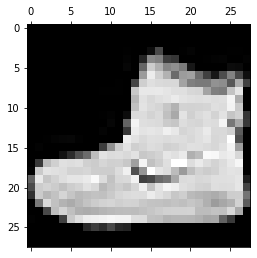

[9]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 23

In [265]:

print("The shape of the digits dataset:") 
print(X_train.shape)
plt.gray()
plt.matshow(X_train[0])
plt.show()
print(y_train[0:1])
print(X_train[0,:])

In [266]:
X_train.shape

(60000, 28, 28)

In [267]:
# Scale the dataset

X_scale = StandardScaler()
X_train = [X_scale.fit_transform(X_train[i]).flatten() for i in range(len(X_train))]

In [268]:
X_test = [X_scale.fit_transform(X_test[i]).flatten() for i in range(len(X_test))]


In [269]:
X_train[0] # Looking at the new features after scaling

array([-0.34062577, -0.48590849, -0.55368775, -0.57830472, -0.61724799,
       -0.65473466, -0.66524031, -0.69031625, -0.71089238, -0.73827078,
       -0.77682253, -0.7644687 , -0.90444624, -1.24217044, -1.49218887,
       -1.6432188 , -1.7458434 , -1.58582058, -1.56547495, -1.51925798,
       -1.44902444, -1.39545527, -1.35520903, -1.32176483, -1.33646764,
       -1.31334192, -1.22103858, -0.55220401, -0.34062577, -0.48590849,
       -0.55368775, -0.57830472, -0.61724799, -0.65473466, -0.66524031,
       -0.69031625, -0.71089238, -0.73827078, -0.77682253, -0.7644687 ,
       -0.90444624, -1.24217044, -1.49218887, -1.6432188 , -1.7458434 ,
       -1.58582058, -1.56547495, -1.51925798, -1.44902444, -1.39545527,
       -1.35520903, -1.32176483, -1.33646764, -1.31334192, -1.22103858,
       -0.55220401, -0.34062577, -0.48590849, -0.55368775, -0.57830472,
       -0.61724799, -0.65473466, -0.66524031, -0.69031625, -0.71089238,
       -0.73827078, -0.77682253, -0.7644687 , -0.90444624, -1.24

In [270]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [271]:
# Downsample the data

# Add y_train back as an additional column to X_train
y_train = y_train.reshape((-1,1))
X_train = np.append(X_train, y_train, axis=1)

# Add y_test back as an additional column to X_test
y_test = y_test.reshape((-1,1))
X_test = np.append(X_test, y_test, axis=1)

# Shuffle the data
np.random.shuffle(X_train)
np.random.shuffle(X_test)

# Slice out only the first 1078 from X_train and 719 from X_test
X_train = X_train[0:1078]
X_test = X_test[0:719]

# Remove the last columns of X_train and X_test and place them back into y_train and y_test
y_train = X_train[:,-1]
y_test = X_test[:,-1]
X_train = X_train[:,0:X_train.shape[1]-1]
X_test = X_test[:,0:X_test.shape[1]-1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1078, 784)
(1078,)
(719, 784)
(719,)


In [295]:
print(y_train)

[0. 8. 8. ... 1. 6. 1.]


The shape of the digits dataset:
(1078, 784)


<Figure size 432x288 with 0 Axes>

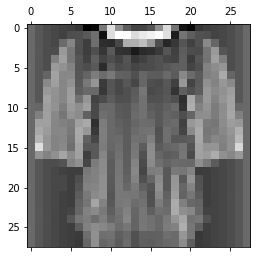

0.0


In [298]:
# Show that newly downsampled X_train still matches with y_train
# Here we display a t-shirt with label of 0 which is correct

X_train_test = np.zeros((28,28))
for i in range(28):
    X_train_test[i] = X_train[0][28*i:28*i+28]
print(X_train_test.shape)

print("The shape of the digits dataset:") 
print(X_train.shape)
plt.gray()
plt.matshow(X_train_test)
plt.show()
print(y_train[0])

(28, 28)
The shape of the digits dataset:
(1078, 784)


<Figure size 432x288 with 0 Axes>

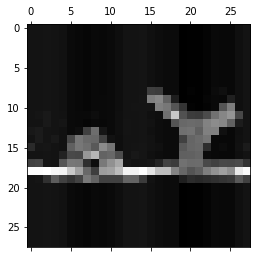

5.0


In [306]:
# Again we show that, as expected, an image of a sandal has a label of 5

X_train_test2 = np.zeros((28,28))
for i in range(28):
    X_train_test2[i] = X_train[435][28*i:28*i+28]
print(X_train_test2.shape)

print("The shape of the digits dataset:") 
print(X_train.shape)
plt.gray()
plt.matshow(X_train_test2)
plt.show()
print(y_train[435])

In [307]:
# Convert digits to vectors (one hot encoding)
y_v_train = convert_y_to_vect(y_train.astype(np.int))
y_v_test = convert_y_to_vect(y_test.astype(np.int))

In [302]:
from keras.models import Sequential
from keras.layers import Dense

In [303]:
# Define the keras model
model = Sequential()
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

# Compile the keras model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])

In [304]:
# Train the keras model
model.fit(X_train, y_v_train, epochs = 150, batch_size = 1)

Epoch 1/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.1384 - accuracy: 0.1160
Epoch 2/150
1078/1078 [==============================] - 2s 2ms/step - loss: 0.0958 - accuracy: 0.1753
Epoch 3/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0910 - accuracy: 0.2449
Epoch 4/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0896 - accuracy: 0.2857
Epoch 5/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0890 - accuracy: 0.3071
Epoch 6/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0887 - accuracy: 0.3256
Epoch 7/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0884 - accuracy: 0.3182
Epoch 8/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0881 - accuracy: 0.3321
Epoch 9/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.3247
Epoch 10/150
1078/1078 [==============================] - 3s 3ms/step - l

In [305]:
# Evaluate the keras model
accuracy = model.evaluate(X_test, y_v_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

719/719 [==============================] - 0s 214us/step
Accuracy: 73.99


### Keras implementation plus extension

In [316]:
# Define the keras model with softmax outer layer
model_plus_ext = Sequential()
model_plus_ext.add(Dense(64, activation='sigmoid'))
model_plus_ext.add(Dense(30, activation='sigmoid'))
model_plus_ext.add(Dense(10, activation='softmax'))

# Compile the keras model
model_plus_ext.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])

In [317]:
# Train the keras model
model_plus_ext.fit(X_train, y_v_train, epochs = 150, batch_size = 1)

Epoch 1/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0929 - accuracy: 0.1104
Epoch 2/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0916 - accuracy: 0.1187
Epoch 3/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0907 - accuracy: 0.1865
Epoch 4/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0900 - accuracy: 0.2486
Epoch 5/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0895 - accuracy: 0.2774
Epoch 6/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0889 - accuracy: 0.2885
Epoch 7/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.3098
Epoch 8/150
1078/1078 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.3024
Epoch 9/150
1078/1078 [==============================] - 3s 3ms/step - loss: 0.0875 - accuracy: 0.3117
Epoch 10/150
1078/1078 [==============================] - 3s 2ms/step - l

In [318]:
# Evaluate the keras model
accuracy = model_plus_ext.evaluate(X_test, y_v_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

719/719 [==============================] - 0s 222us/step
Accuracy: 75.38
